## Unsupervised Learning Model

## Task-2 Predicting optimum number of clusters for IRIS Dataset

**Importing the required libraries and dataset**

In [48]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#importing the dataset
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


 **Finding the optimum number of clusters**

**Importing KMeans Clustering from sklearn**

In [49]:
#Finding optimum value of k
from sklearn.cluster import KMeans
k_inertia=[]
for i in range(1,11):
    kmc=KMeans(n_clusters=i,random_state=44,init='k-means++',n_init=10,max_iter=300)
    kmc.fit(x)
    k_inertia.append(kmc.inertia_)
print(k_inertia)

C:\Users\devas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25552380952379, 46.44618205128204, 39.03998724608725, 34.42019178628389, 30.598185064935077, 28.298658730158742, 26.073173217133757]


**Plotting the Inertia v/s the k value using the ELBOW METHOD**

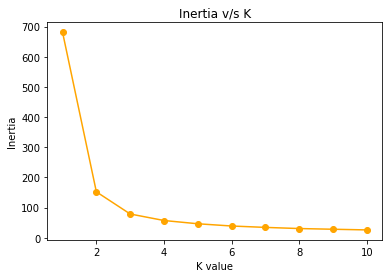

In [50]:
#Plotting the ELBOW Curve
plt.plot(range(1,11),k_inertia,color='orange',marker='o')
plt.title('Inertia v/s K')
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.show()

From the above graph it is clear that since the graph stops changing rapidly at k=3,hence the optimum number of clusters will be 3. Thus, we will have total three clusters in our model.

**Building the model**

In [51]:
#Building the model
kmc=KMeans(n_clusters=3,max_iter=300,n_init=10,init='k-means++',random_state=44)
kmc.fit(x)
y_pred=kmc.predict(x)

**Predicting the values**

In [52]:
#predicting the values
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**Finding the centroids**

In [53]:
#Finding the centroids
cen=kmc.cluster_centers_
cen

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

**Visualizing the clusters**

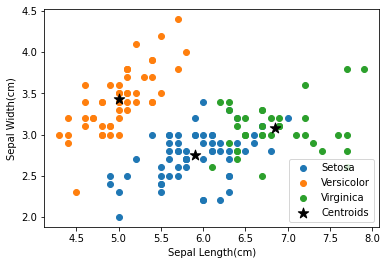

In [54]:
#visualizing the clusters for sepal length and sepal width

plt.scatter(x[y_pred==0,0],x[y_pred==0,1],label='Setosa')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],label='Versicolor')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],label='Virginica')

plt.scatter(cen[:,0],cen[:,1],s=120,marker='*',color='Black',label='Centroids')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.legend()
plt.show()